In [2]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


In [3]:
include("aux_functions.jl")

get_data (generic function with 2 methods)

We try two initial data sets:

1. l_pulse is a pulse to the left that starts on the left side and moves to the left, bounces at the origin and gets into the right side. 
2. r_pulse is a pulse to the left that starts on the right side and moves to the left, bounces at the origin and then gets back on the rigth side.




In [4]:

r_pulse = true


if r_pulse
    file_name = "Results/r_pulse_cone_401.jld2"
end

data = load(file_name);
run_name = data["run_name"]
@show (x0,x1,p_bump,A) = data["par_init"]
@show (Nr, R, dr) = data["par_grid"]
@show (t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"]


r = [dr*(i-1) for i in 1:Nr]
t = [dt_d*(i-1) for i in 1:M_d]

(x0, x1, p_bump, A) = data["par_init"] = (0.2, 0.4, 6, 1.0)
(Nr, R, dr) = data["par_grid"] = (401, 1.0, 0.0025)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 3.0, 1601, 0.001875, 161, 0.01875)


161-element Vector{Float64}:
 0.0
 0.01875
 0.0375
 0.056249999999999994
 0.075
 0.09375
 0.11249999999999999
 0.13125
 0.15
 0.16874999999999998
 ⋮
 2.85
 2.86875
 2.8874999999999997
 2.90625
 2.925
 2.94375
 2.9625
 2.9812499999999997
 3.0

In [5]:
v = zeros(3Nr,M_d)

for j in 1:M_d
    tiempo = @sprintf("%05d", j)
    v[:,j] = data["u/u_$tiempo"]
end

In [6]:

    ϕ_R = view(v,1:Nr,:)
    S = view(v,Nr+1:2Nr,:)
    W = view(v,2Nr+1:3Nr,:);

    typeof(ϕ_R)

    ϕ_R;

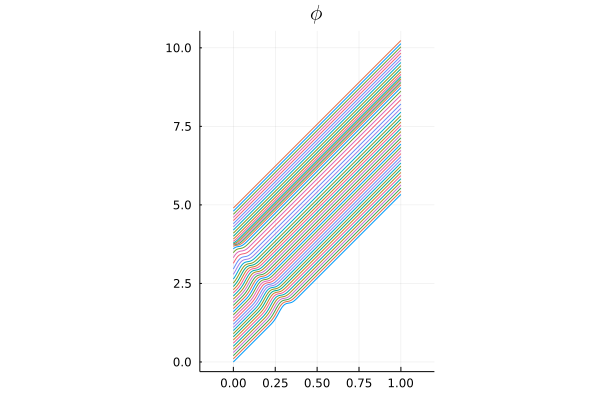

In [25]:
scale = 0.2
α = 0.1
β = α*(M_d-1)/(t_f-t_i)
#aspectratio = ((α*(M_d-1) + β*R)/(1+sqrt(2)))^(-1)
aspectratio = 1/β

p = plot(title=L"$\phi$", legend=false, aspectratio=aspectratio, xlim=(-0.2,R+0.2))
for n in 1:1:50 #M_d  
    plot!(p,r,scale*ϕ_R[:,n].+α*(n-1) + β*r  ,
    #color=:blue    , 
    label="n=$n")
end

p

if r_pulse
    #png("r_pulse_line")
end

p

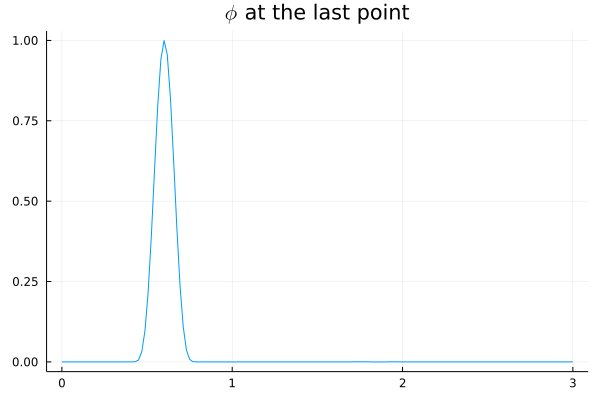

In [12]:
plot(t,ϕ_R[end,:],label="", title=L"\phi"*" at the last point")

In [151]:
if false
p = plot(title=L"S")
for n in 1:M_d  
    plot!(p,l,vp[:,n],label="")
    plot!(p,r,W[:,n], label="n=$n")
end

p
end

In [152]:

animation = false
pg = plot(ylim=(-0.02,1.02), legend=false)
if animation
    anim = @animate for n = 1:M_d
        plot(pg,l,ϕ_L[:,n]
        ,title = "ϕ at t = $(dt_d*n)"
        )
        plot(pg,r,ϕ_R[:,n])
    end

     
    gif(anim, "ϕ"  * run_name * ".gif", fps = 5)
end

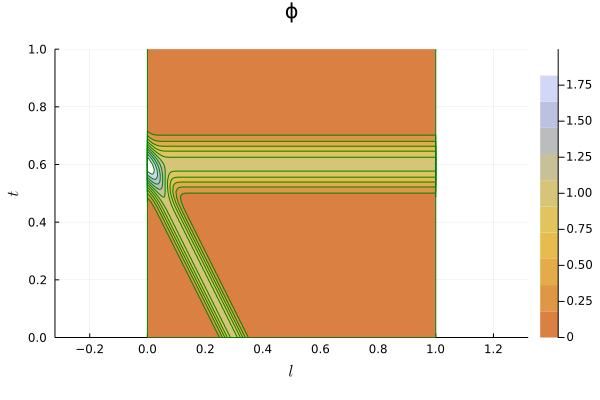

┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015


In [22]:




contour(r,t,ϕ_R'
        , fc =:beach
        , fill = true
        , levels = 10
        , c = cgrad(:ocean)
        , xlabel = L"l", ylabel = L"t"
        , title = "ϕ"
        , aspectratio = 1
        , ylim=(0,1)
)
#=
if r_pulse
        png("r_pulse")
end
if l_pulse
        png("l_pulse")
end
=#
#t
#ϕ_L

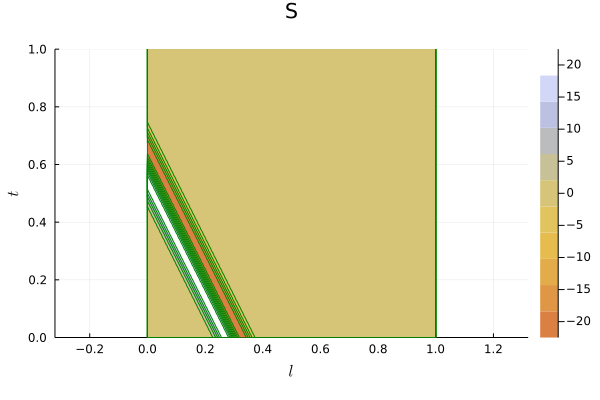

┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015


In [21]:
contour(r,t,S'
        , fc =:beach
        , fill = true
        , levels = 10
        , c = cgrad(:ocean)
        , xlabel = L"l", ylabel = L"t"
        , title = "S"
        , aspectratio = 1
        , ylim=(0,1)
)

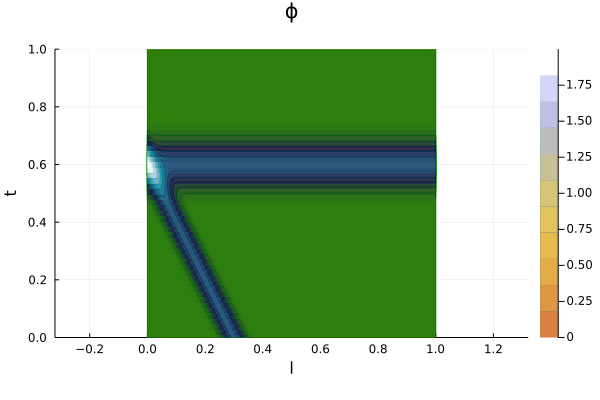

┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015
┌ Warning: GR: filled contour only supported with black contour lines
└ @ Plots /Users/reula/.julia/packages/Plots/hxZ0l/src/backends/gr.jl:2015


In [23]:

heatmap!(r,t,ϕ_R'
        ,fc = :ocean
        ,linealpha = 0.8, fillalpha=0.8
        ,xlabel = "l", ylabel = "t"
        ,title = "ϕ"
        , aspectratio = 1
        , ylim=(0,1)
    )

In [156]:
#X=[(r[i],u[j]+r[i]) for i in 1:Nr, j in 1:M_d]

In [157]:
#heatmap(X,ϕ_R)
#surface(X,ϕ_R)